In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
df = pd.read_csv('data/fans-data.csv')
df.head()

,id,full_id,brand,category4,name,price,old_price,discount,rating,total_reviews
0,334520266,ox-spacetek-18-inches-standing-fan-334520266,Ox,Household Fans,Ox Spacetek 18 Inches Standing Fan,"₦ 19,400","₦ 25,000",22%,4.2,270.0
1,76698431,binatone-16-inches-standing-fan-a1691-black-2-...,Binatone,Household Fans,Binatone 16 Inches Standing Fan (A1691) - Blac...,"₦ 40,740","₦ 50,740",20%,4.3,891.0
2,346616815,glamstar-18-inches-rechargeable-standing-fan-w...,Glamstar,Household Fans,Glamstar 18 Inches Rechargeable Standing Fan W...,"₦ 69,500","₦ 85,000",18%,4.7,13.0
3,46157327,cloud-energy-16-10watt-dc-standing-fan-with-re...,Cloud Energy,Household Fans,Cloud Energy 16'' 10watt DC Standing Fan With ...,"₦ 39,990","₦ 50,000",20%,4.3,442.0
4,82939109,nexus-16-inches-standing-fan-nx-4400b-black-82...,Nexus,Household Fans,Nexus 16 Inches Standing Fan (NX 4400B) - Black,"₦ 20,475","₦ 25,475",20%,4.0,3840.0


In [3]:
df.shape

(2000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2000 non-null   object 
 1   full_id        2000 non-null   object 
 2   brand          2000 non-null   object 
 3   category4      2000 non-null   object 
 4   name           2000 non-null   object 
 5   price          2000 non-null   object 
 6   old_price      1566 non-null   object 
 7   discount       1566 non-null   object 
 8   rating         855 non-null    float64
 9   total_reviews  855 non-null    float64
dtypes: float64(2), object(8)
memory usage: 156.4+ KB


In [5]:
df.describe()

,rating,total_reviews
count,855.000000,855.000000
mean,4.116491,31.622222
std,0.887948,158.311579
min,1.000000,1.000000
25%,3.900000,1.000000
50%,4.300000,3.000000
75%,4.800000,14.000000
max,5.000000,3840.000000


In [6]:
df.drop(columns=['id', 'category4'], inplace=True)
df.head()

,full_id,brand,name,price,old_price,discount,rating,total_reviews
0,ox-spacetek-18-inches-standing-fan-334520266,Ox,Ox Spacetek 18 Inches Standing Fan,"₦ 19,400","₦ 25,000",22%,4.2,270.0
1,binatone-16-inches-standing-fan-a1691-black-2-...,Binatone,Binatone 16 Inches Standing Fan (A1691) - Blac...,"₦ 40,740","₦ 50,740",20%,4.3,891.0
2,glamstar-18-inches-rechargeable-standing-fan-w...,Glamstar,Glamstar 18 Inches Rechargeable Standing Fan W...,"₦ 69,500","₦ 85,000",18%,4.7,13.0
3,cloud-energy-16-10watt-dc-standing-fan-with-re...,Cloud Energy,Cloud Energy 16'' 10watt DC Standing Fan With ...,"₦ 39,990","₦ 50,000",20%,4.3,442.0
4,nexus-16-inches-standing-fan-nx-4400b-black-82...,Nexus,Nexus 16 Inches Standing Fan (NX 4400B) - Black,"₦ 20,475","₦ 25,475",20%,4.0,3840.0


In [7]:
# Find duplicates
print(df.duplicated().sum())
df[df.duplicated()]

79


,full_id,brand,name,price,old_price,discount,rating,total_reviews
112,18-inches-standing-fan-heavy-breeze-ox-mpg3352822,Generic,"18-inches Standing Fan, Heavy Breeze","₦ 25,900",NaN,NaN,3.9,38.0
119,18-standing-fan-hexa-18-inch-ox-mpg3147329,Ox,Ox 18'' Standing Fan - 18 Inch,"₦ 29,999","₦ 32,500",8%,3.8,13.0
131,ox-2-sets-of-18-standing-fan-promo-238829587,Ox,Ox 2 Sets Of 18” Standing Fan - Promo,"₦ 56,900","₦ 72,000",21%,4.7,23.0
132,18-inches-acdc-standing-fan-remote-non-recharg...,Qasa,Qasa 18 Inches AC/DC Standing Fan + Remote (No...,"₦ 44,999","₦ 75,000",40%,4.3,180.0
140,standing-fan-industrial-20-inches-ox-mpg3632948,Ox,"Ox Standing Fan Industrial 20"" Inches","₦ 96,990","₦ 160,000",39%,4.3,24.0
...,...,...,...,...,...,...,...,...
475,18-adjustable-standing-fan-black-ox-mpg4128525,Ox,"Ox 18"" PLUS ELECTRIC STANDING FAN - 18 Inches","₦ 28,250","₦ 35,000",19%,4.0,36.0
479,duravolt-7inches-rechargeable-table-fansolar-p...,Duravolt,Duravolt 7inches Rechargeable Table Fan+Solar ...,"₦ 28,500","₦ 30,000",5%,3.0,1.0
488,duravolt-18-dc-standing-fan-dsf-183-dc-366846944,Duravolt,"Duravolt 18"" DC STANDING FAN, DSF-183 Dc","₦ 49,995","₦ 50,000",1%,NaN,NaN
494,best-buy-bb-18-inches-standing-high-speed-fan-...,Best Buy,Best Buy BB 18' Inches Standing High Speed Fan...,"₦ 25,000",NaN,NaN,3.0,1.0


In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)
print('New shape: ', df.shape)
df.head()

New shape:  (1921, 8)


,full_id,brand,name,price,old_price,discount,rating,total_reviews
0,ox-spacetek-18-inches-standing-fan-334520266,Ox,Ox Spacetek 18 Inches Standing Fan,"₦ 19,400","₦ 25,000",22%,4.2,270.0
1,binatone-16-inches-standing-fan-a1691-black-2-...,Binatone,Binatone 16 Inches Standing Fan (A1691) - Blac...,"₦ 40,740","₦ 50,740",20%,4.3,891.0
2,glamstar-18-inches-rechargeable-standing-fan-w...,Glamstar,Glamstar 18 Inches Rechargeable Standing Fan W...,"₦ 69,500","₦ 85,000",18%,4.7,13.0
3,cloud-energy-16-10watt-dc-standing-fan-with-re...,Cloud Energy,Cloud Energy 16'' 10watt DC Standing Fan With ...,"₦ 39,990","₦ 50,000",20%,4.3,442.0
4,nexus-16-inches-standing-fan-nx-4400b-black-82...,Nexus,Nexus 16 Inches Standing Fan (NX 4400B) - Black,"₦ 20,475","₦ 25,475",20%,4.0,3840.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   full_id        1921 non-null   object 
 1   brand          1921 non-null   object 
 2   name           1921 non-null   object 
 3   price          1921 non-null   object 
 4   old_price      1505 non-null   object 
 5   discount       1505 non-null   object 
 6   rating         796 non-null    float64
 7   total_reviews  796 non-null    float64
dtypes: float64(2), object(6)
memory usage: 135.1+ KB


In [10]:
df.isnull().sum()

full_id             0
brand               0
name                0
price               0
old_price         416
discount          416
rating           1125
total_reviews    1125
dtype: int64

In [11]:
def show_pct_missing():
    pct_missing = np.round(df.isnull().sum()/df.shape[0] * 100).reset_index(name='percent_missing')
    sns.barplot(x='index', y='percent_missing', data=pct_missing)
    plt.show()

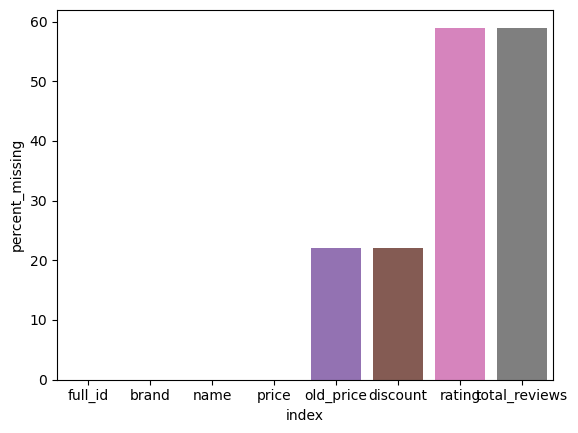

In [12]:
show_pct_missing()

In [13]:
df['price'].unique().tolist()

['₦ 19,400',
 '₦ 40,740',
 '₦ 69,500',
 '₦ 39,990',
 '₦ 20,475',
 '₦ 25,900',
 '₦ 38,799',
 '₦ 29,999',
 '₦ 56,900',
 '₦ 74,998',
 '₦ 65,000',
 '₦ 36,900',
 '₦ 25,990',
 '₦ 24,190',
 '₦ 44,999',
 '₦ 13,068',
 '₦ 22,000',
 '₦ 27,000',
 '₦ 96,990',
 '₦ 28,890',
 '₦ 28,500',
 '₦ 5,699',
 '₦ 72,899',
 '₦ 22,500',
 '₦ 51,000',
 '₦ 11,880',
 '₦ 42,500',
 '₦ 52,799',
 '₦ 27,500',
 '₦ 45,699',
 '₦ 12,000',
 '₦ 29,990',
 '₦ 95,699',
 '₦ 89,500',
 '₦ 45,999',
 '₦ 49,999',
 '₦ 83,930',
 '₦ 185,000',
 '₦ 41,895',
 '₦ 84,000',
 '₦ 113,399',
 '₦ 104,985',
 '₦ 9,500',
 '₦ 105,500',
 '₦ 29,998',
 '₦ 14,256',
 '₦ 49,000',
 '₦ 71,000',
 '₦ 25,909',
 '₦ 28,290',
 '₦ 24,900',
 '₦ 97,995',
 '₦ 122,000',
 '₦ 24,290',
 '₦ 50,500',
 '₦ 95,995',
 '₦ 24,990',
 '₦ 73,000',
 '₦ 4,590',
 '₦ 38,950',
 '₦ 52,499',
 '₦ 67,500',
 '₦ 23,500',
 '₦ 68,000',
 '₦ 77,995',
 '₦ 57,799',
 '₦ 114,802',
 '₦ 48,000',
 '₦ 40,995',
 '₦ 6,138',
 '₦ 89,990',
 '₦ 39,199',
 '₦ 139,000',
 '₦ 28,000',
 '₦ 29,900',
 '₦ 62,499',
 '₦ 28,25

In [14]:
def clean_price(price):
    if type(price) != str:
        return price
    
    clean = lambda p: float(p.replace('₦ ', '').replace(',', '').strip())
    price_has_range = len(price.split('-')) == 2
    
    if not price_has_range:
        return clean(price)
    prices = [clean(p) for p in price.split('-')]
    return np.mean(prices)

In [15]:
# Clean prices
df['price'] = df['price'].apply(clean_price).astype('float')
df['old_price'] = df['old_price'].apply(clean_price).astype('float')
df['price'].head()

0    19400.0
1    40740.0
2    69500.0
3    39990.0
4    20475.0
Name: price, dtype: float64

In [16]:
# Fill null old prices with current price (no discounts)
df['old_price'] = df['old_price'].fillna(df['price'])

df['discount'].fillna('0%', inplace=True)
df['discount'] = df['discount'].str.replace('%', '').astype('int')
df['discount'].head()

0    22
1    20
2    18
3    20
4    20
Name: discount, dtype: int32

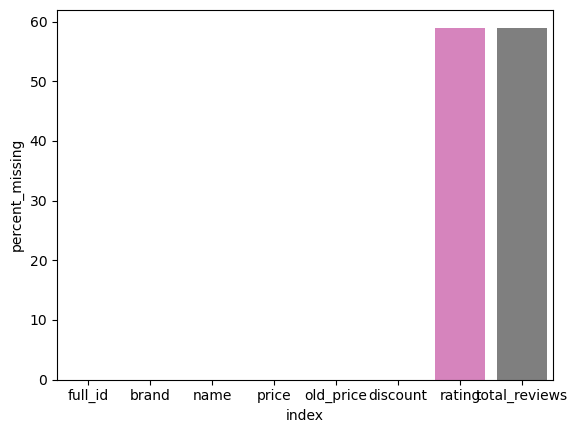

In [17]:
show_pct_missing()

In [18]:
cols_fill_zero = ['rating', 'total_reviews']
df[cols_fill_zero] = df[cols_fill_zero].fillna(0)

In [19]:
df.total_reviews = df.total_reviews.astype('int')

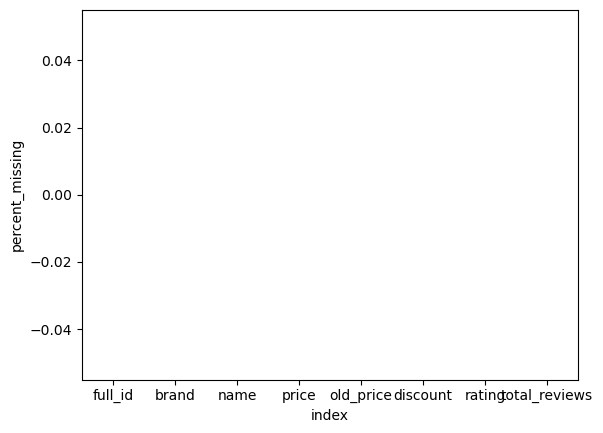

In [20]:
show_pct_missing()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   full_id        1921 non-null   object 
 1   brand          1921 non-null   object 
 2   name           1921 non-null   object 
 3   price          1921 non-null   float64
 4   old_price      1921 non-null   float64
 5   discount       1921 non-null   int32  
 6   rating         1921 non-null   float64
 7   total_reviews  1921 non-null   int32  
dtypes: float64(3), int32(2), object(3)
memory usage: 120.1+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1921.0,51715.462780,56170.860938,1599.0,17210.0,31990.0,74995.0,842886.0
old_price,1921.0,71830.282405,85026.986954,2500.0,23868.0,48000.0,98000.0,1186378.0
discount,1921.0,24.916189,20.126598,0.0,5.0,24.0,41.0,92.0
rating,1921.0,1.701249,2.105303,0.0,0.0,0.0,4.0,5.0
total_reviews,1921.0,12.258199,103.261707,0.0,0.0,0.0,2.0,3840.0


In [65]:
df.to_csv('fans-data-cleaned.csv')

### Feature Engineering

In [73]:
def get_price_range(pr):
  if pr < 50_000:
    return '<50k'
  if pr <= 100_000:
    return '50-100k'
  if pr <= 200_000:
    return '100-200k'
  return '>200k'

df['price_range'] = df['price'].apply(get_price_range)
df.head()

,full_id,brand,name,price,old_price,discount,rating,total_reviews,price_range
0,ox-spacetek-18-inches-standing-fan-334520266,Ox,Ox Spacetek 18 Inches Standing Fan,19400.0,25000.0,22,4.2,270,<50k
1,binatone-16-inches-standing-fan-a1691-black-2-...,Binatone,Binatone 16 Inches Standing Fan (A1691) - Blac...,40740.0,50740.0,20,4.3,891,<50k
2,glamstar-18-inches-rechargeable-standing-fan-w...,Glamstar,Glamstar 18 Inches Rechargeable Standing Fan W...,69500.0,85000.0,18,4.7,13,50-100k
3,cloud-energy-16-10watt-dc-standing-fan-with-re...,Cloud Energy,Cloud Energy 16'' 10watt DC Standing Fan With ...,39990.0,50000.0,20,4.3,442,<50k
4,nexus-16-inches-standing-fan-nx-4400b-black-82...,Nexus,Nexus 16 Inches Standing Fan (NX 4400B) - Black,20475.0,25475.0,20,4.0,3840,<50k


In [23]:
df['name'].unique().tolist()

['Ox Spacetek 18 Inches Standing Fan',
 'Binatone 16 Inches Standing Fan (A1691) - Black + 2 Years Warranty',
 'Glamstar 18 Inches Rechargeable Standing Fan White',
 "Cloud Energy 16'' 10watt DC Standing Fan With Remote Control-INVERTER FAN(CE-DC-409) - Black",
 'Nexus 16 Inches Standing Fan (NX 4400B) - Black',
 '18-inches Standing Fan, Heavy Breeze',
 "Cloud Energy 16'' 10watt DC Standing Fan With Remote Control-INVERTER FAN",
 "Ox 18'' Standing Fan  - 18 Inch",
 'Ox 2 Sets Of 18” Standing Fan - Promo',
 'Duravolt 16 Inches -3 In 1 Rechargeable Fan +Solar Panel + 2-Bulbs',
 'TSES MINI INDUSTRIAL ANTIQUE FAN-30w',
 'Power Deluxe 16" Wall Fan BLUE',
 'Ox 18-Inches Standing Fan (Plastic Blade)+ Free Gift Inside',
 'Ox 18" PLUS STANDING FAN - 18 Inches',
 'Qasa 18 Inches AC/DC Standing Fan + Remote (Non Rechargeable)',
 'Portable Home Small Air Humidifier 3-Speed Fan - Green',
 'Foldable Rechargeable Fan Adjustable Desktop With USB',
 'itel Electric Fan16 Inch-Lite 7-Blade Imitation Natu

In [ ]:
# 16 Inches; 18 Inch; 15.6 Inch; 7inches; 18inch, 8.7 inches; 18'' Inch; 18"; 36"; 16-Inch; 18'; 26''; 17.2"
# Rechargeable, (Non Rechargeable)

# Standing Fan, Stand Fan, STANDING ELECTRIC FAN ||
# Desktop Fan || Small, Portable Fan, Mini, Hand Held, STOOL, Neck Fan, Handy, Table Hand Fan, Hand Pressed Handheld, Table, Folding Fan || Wall Fan
# Tower Fan (--> Large), 

# White, BLUE, Black, Green, Multicolor, Silver, pink
# Free Gift, +free Torch, Mobile Phone Holder
# 30w, 10watt, 25watts, 30W, 15watt, !!!PV-56WC, 
# 360° Rotation
# Remote Control
# Solar Panel, Solar Rechargeable Fan, Solar, Panel, Nosolar, With Solar
# Industrial
# With Adapter
# Bulbs, 2Bulbs, LED Light, Led
# 2 Years Warranty
# AC/DC
# 1.6 Metres, 1.6 Metre
# USB, Type-C
# Air-conditioning,
# Foldable
# power bank function
# 4 In 1, 3in1
# Fm Radio
# 10000mAh, 4000mAh, 4000MAH, 7Ah
# Water Fan, Mist, AC/Mist, Humidifier, Air Cooler
# 5 Blades, Bladeless
# With Battery, No Battery

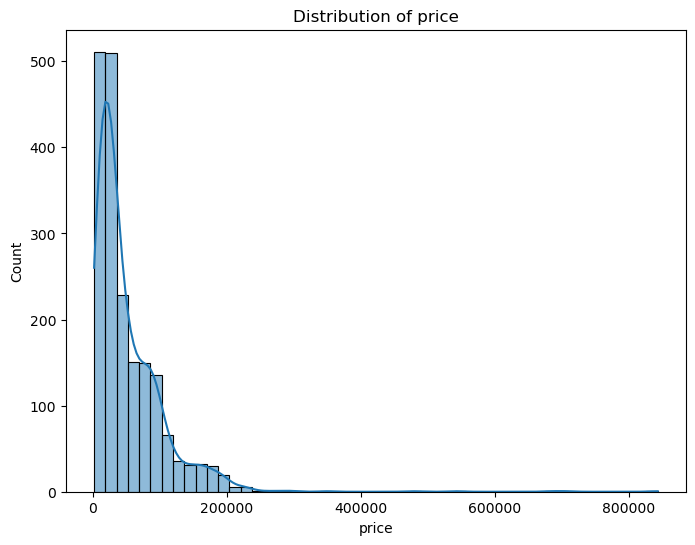

In [74]:
# Distribution of price
plt.figure(figsize=(8, 6))
sns.histplot(x='price', data=df, kde=True, bins=50)
plt.title('Distribution of price')
plt.show()

Text(0.5, 1.0, 'Distribution of Discounts')

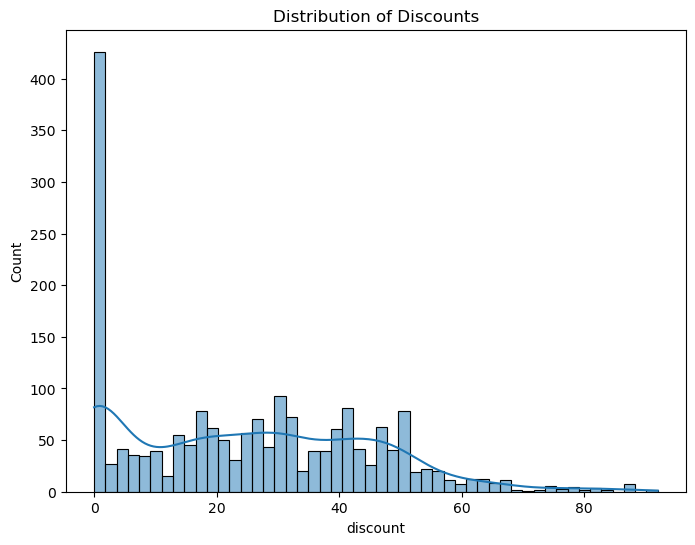

In [75]:
# Distribution of discounts
plt.figure(figsize=(8, 6))
sns.histplot(x='discount', data=df, kde=True, bins=50)
plt.title('Distribution of Discounts')

c:\Users\Chima Orji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


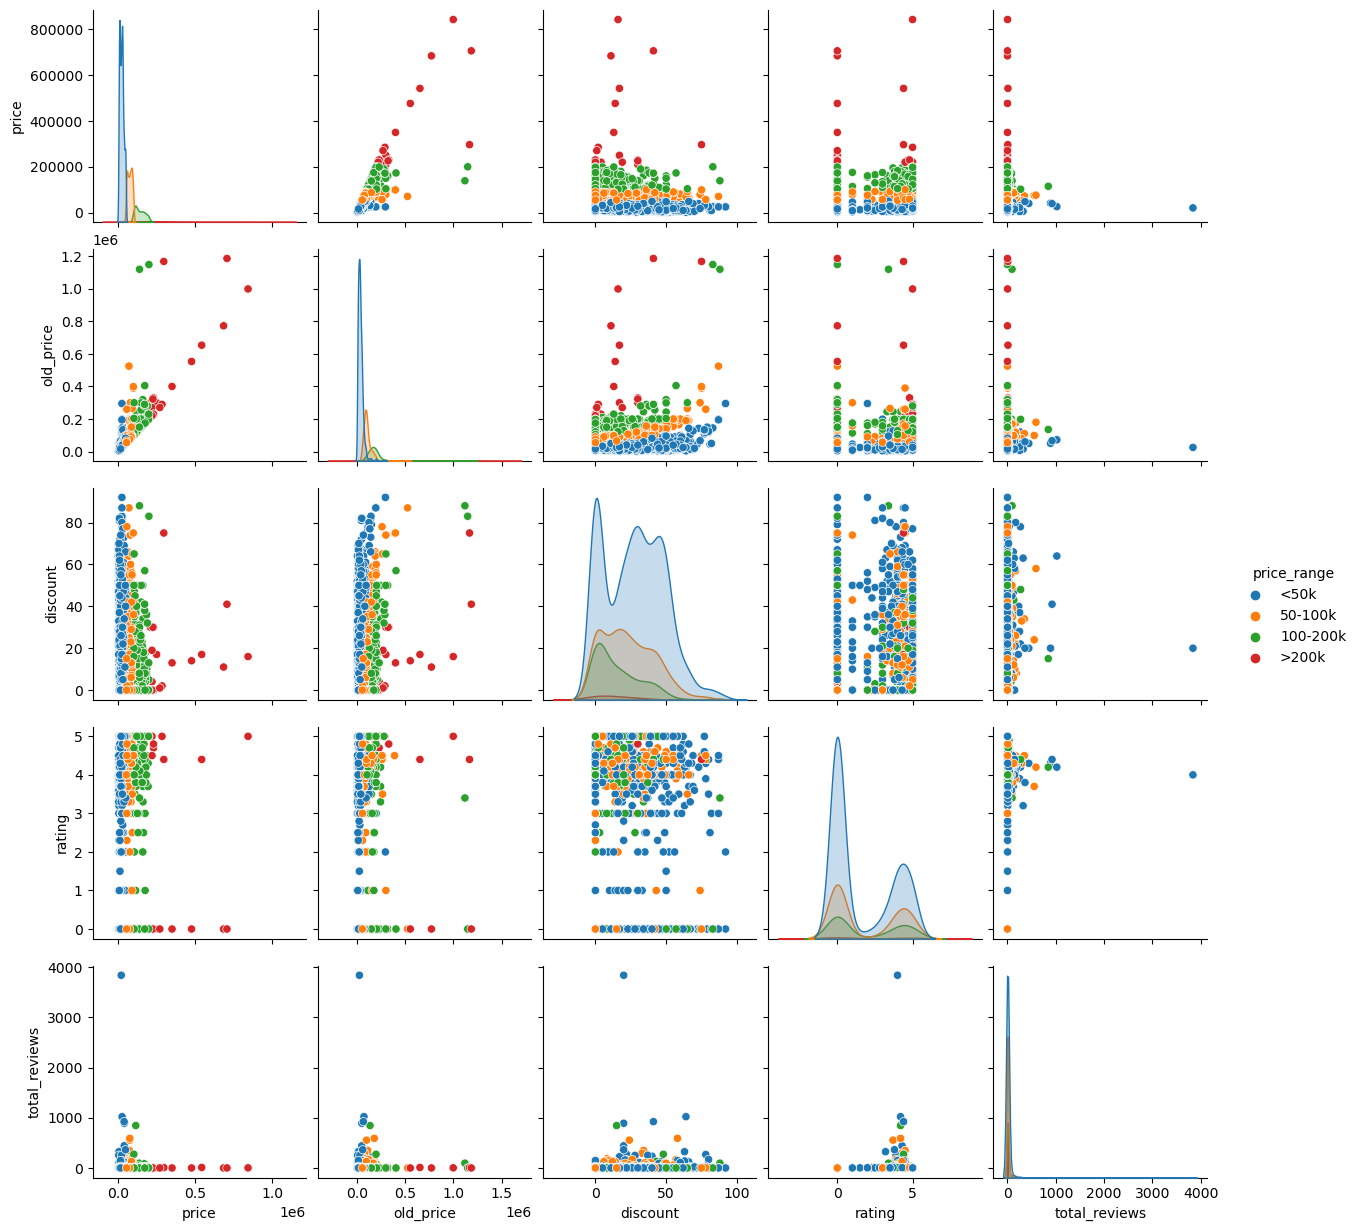

In [76]:
sns.pairplot(df, hue='price_range')

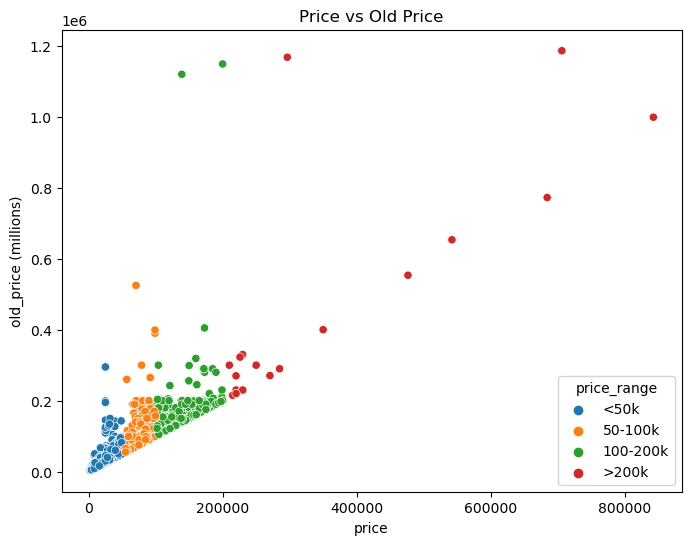

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='old_price', data=df, hue='price_range')
plt.title('Price vs Old Price')
plt.ylabel('old_price (millions)')
plt.show()

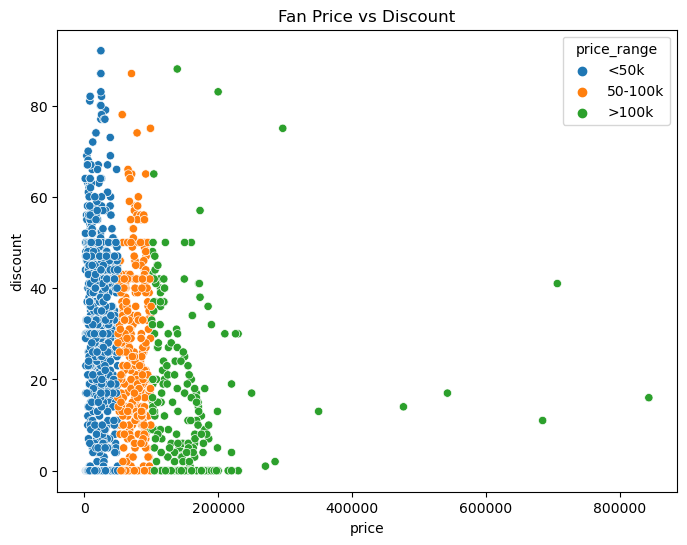

In [72]:
# Prices vs Discount

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='discount', data=df, hue='price_range')
plt.title('Fan Price vs Discount');

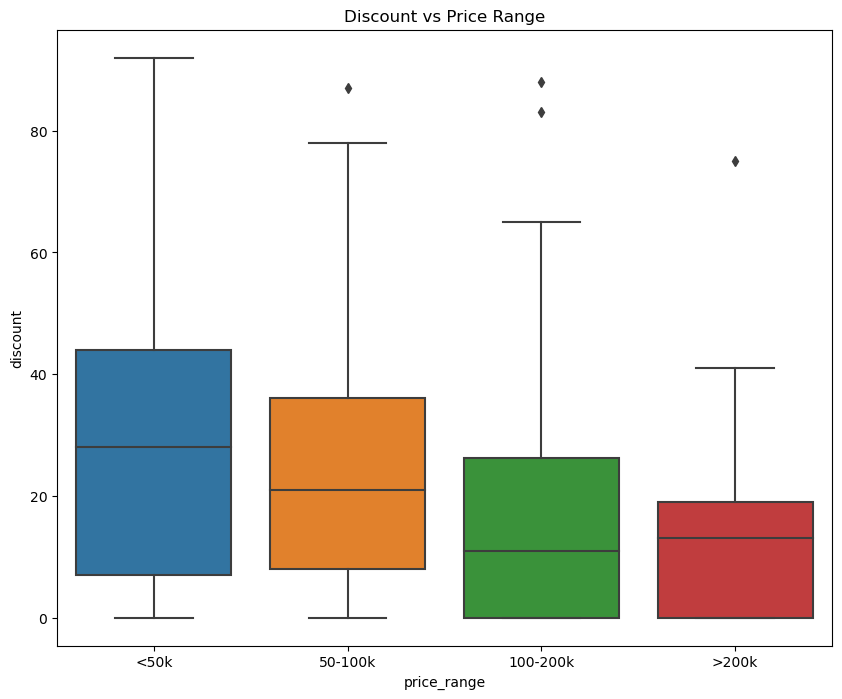

In [86]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='price_range', y='discount', data=df)
plt.title('Discount vs Price Range')
plt.show()

In [81]:
# Conclusion: Less expensive fans (Small fans) have the biggest discounts. More expensive fans have lower discounts

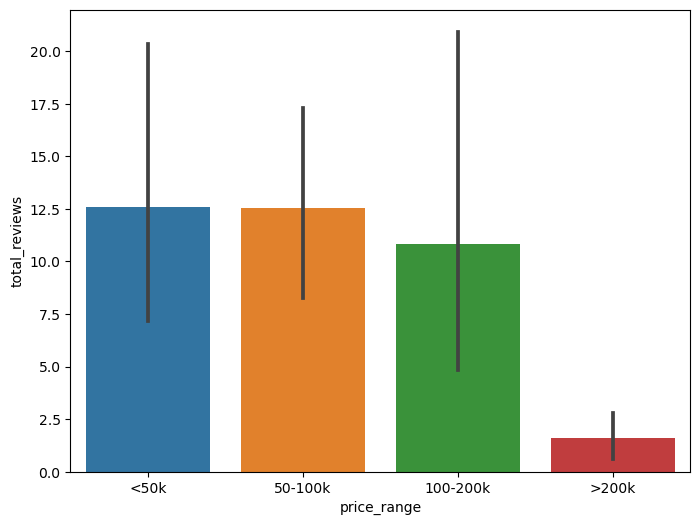

In [102]:
plt.figure(figsize=(8, 6))
sns.barplot(x='price_range', y='total_reviews', data=df)
plt.show()

In [103]:
# Less expensive fans tend to have more reviews

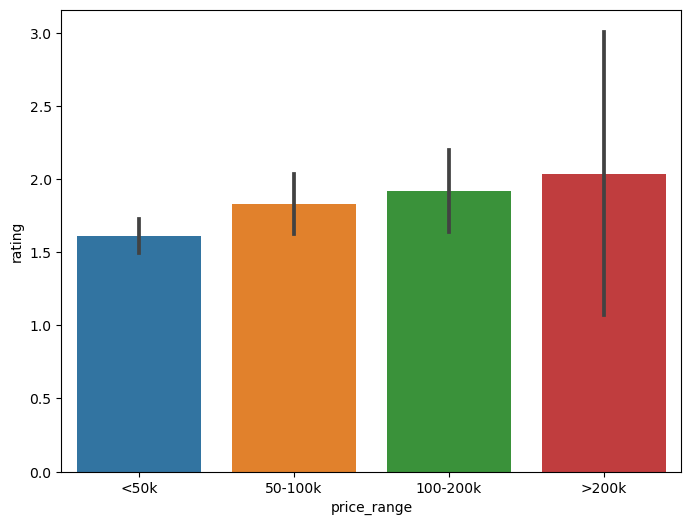

In [104]:
plt.figure(figsize=(8, 6))
sns.barplot(x='price_range', y='rating', data=df)
plt.show()

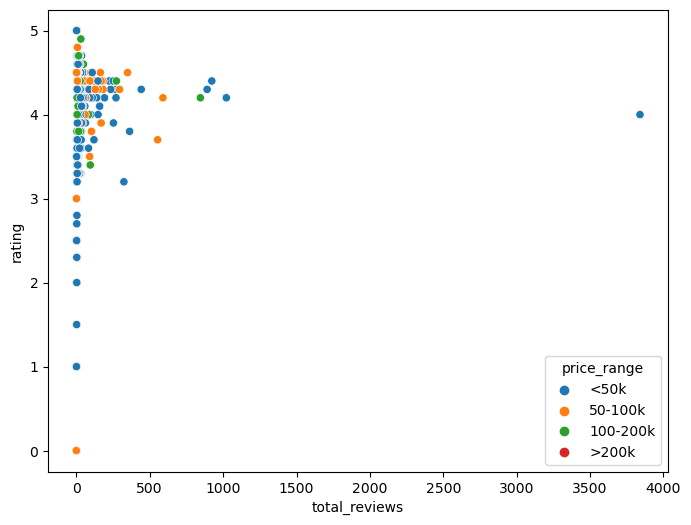

In [106]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_reviews', y='rating', hue='price_range', data=df)
plt.show()

In [109]:
# Only fans of 200k and below had reviews and ratings

In [137]:
# Which brand had the highest reviews and ratings?

plt.figure(figsize=(8, 6))
br_rev = df.sort_values('total_reviews', ascending=False)[['brand', 'total_reviews', 'rating']].head(10)
br_rev
# plt.show()

,brand,total_reviews,rating
4,Nexus,3840,4.0
67,Ox,1022,4.2
78,Lontor,923,4.4
1,Binatone,891,4.3
73,Sun King,845,4.2
107,Duravolt,590,4.2
9,Duravolt,554,3.7
3,Cloud Energy,442,4.3
211,Duravolt,363,3.8
23,Binatone,349,4.5


<Figure size 800x600 with 0 Axes>

Total brands: 109


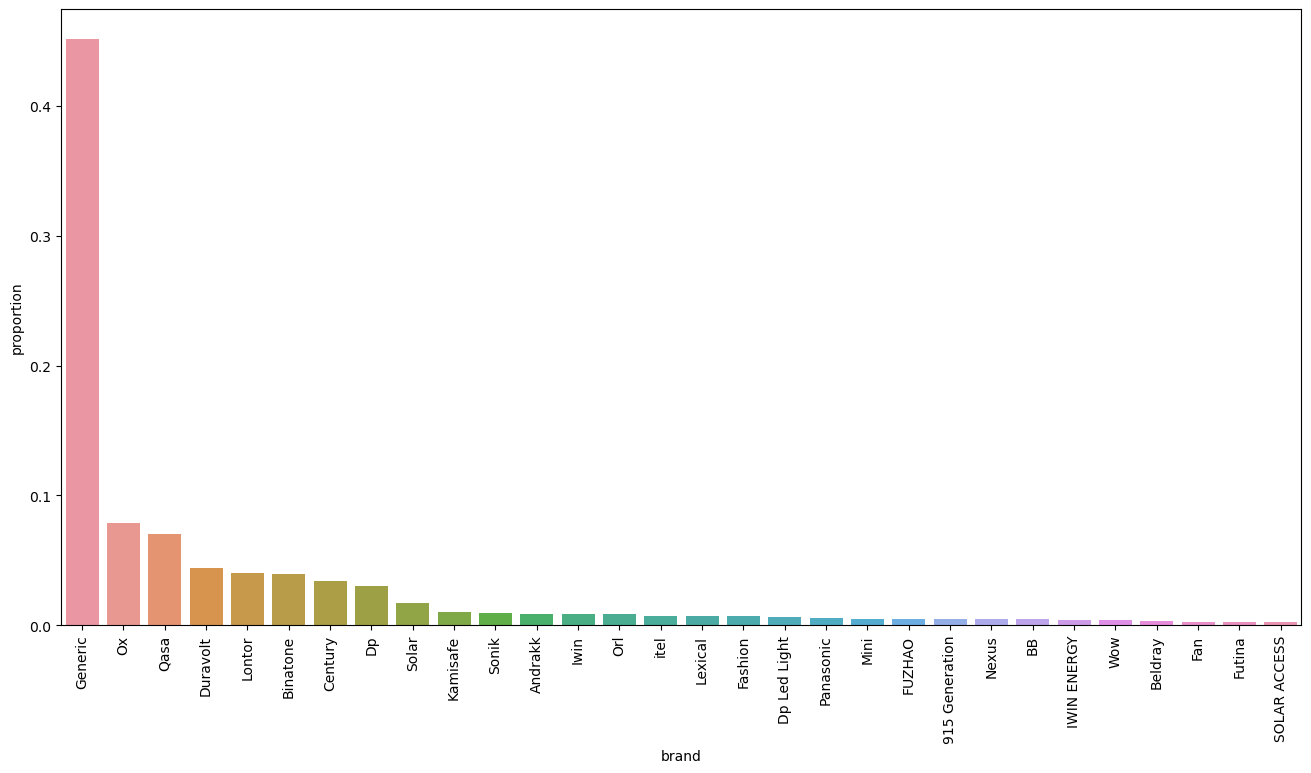

In [139]:
# Brand Production
print('Total brands:', df['brand'].nunique())

top_30_brands = df['brand'].value_counts(normalize=True).reset_index().head(30)

plt.figure(figsize=(16, 8))
sns.barplot(x='brand', y='proportion', data=top_30_brands)
plt.xticks(rotation=90);

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108]),
 [Text(0, 0, 'Ox'),
  Text(1, 0, 'Binatone'),
  Text(2, 0, 'Glamstar'),
  Text(3, 0, 'Cloud Energy'),
  Text(4, 0, 'Nexus'),
  Text(5, 0, 'Generic'),
  Text(6, 0, 'Duravolt'),
  Text(7, 0, 'TSES'),
  Text(8, 0, 'Power Deluxe'),
  Text(9, 0, 'Qasa'),
  Text(10, 0, 'itel'),
  Text(11, 0, 'Ace Elec'),
  Text(12, 0, 'BB'),
  Text(13, 0, 'Iwin'),
  Text(14, 0, 'iYOWEI'),
  Text(15, 0

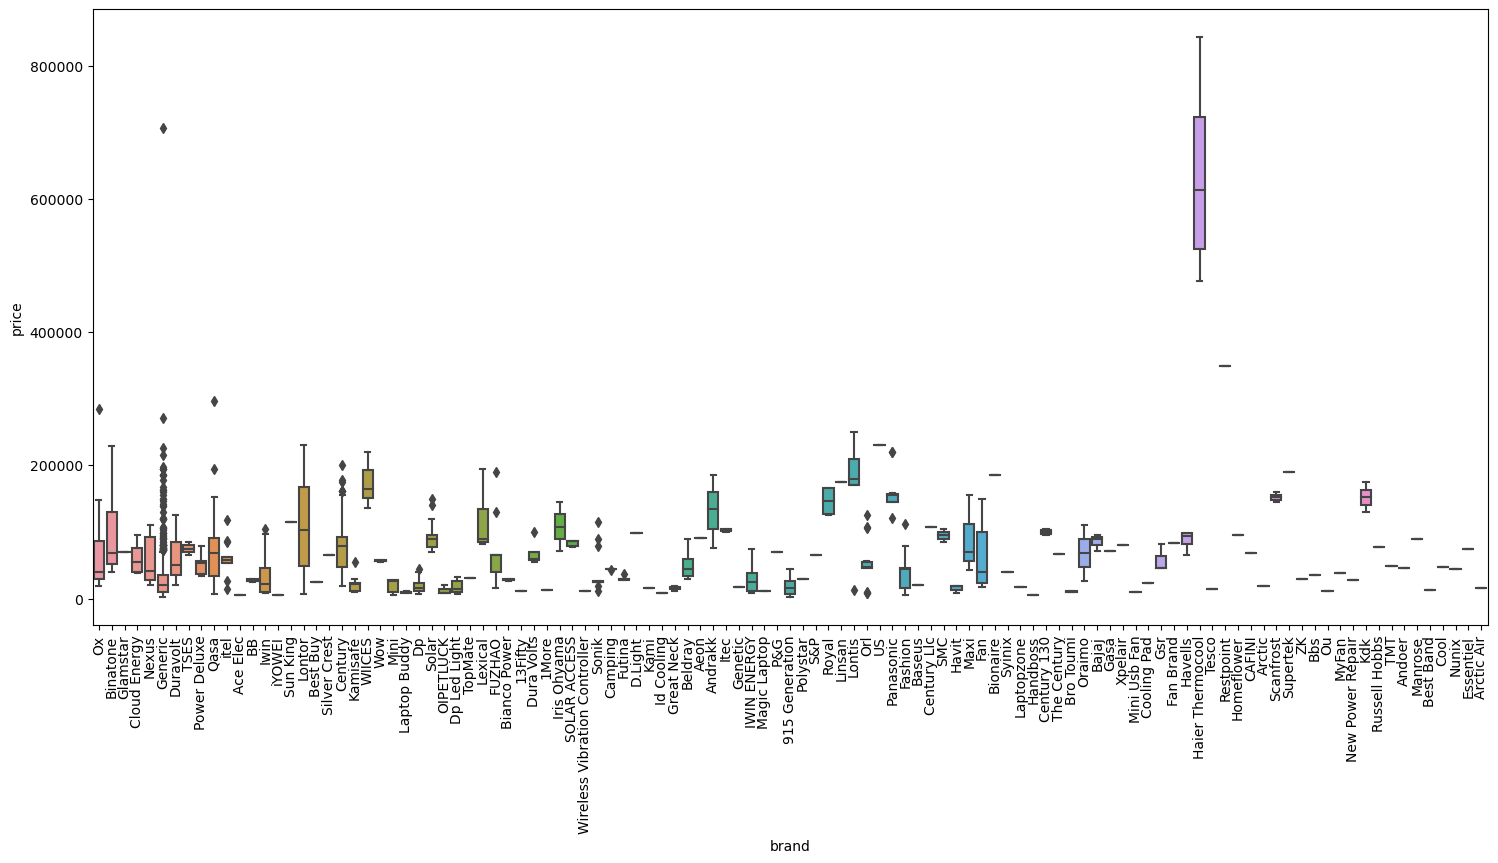

In [140]:
# Brands and the distribution of their fan prices
plt.figure(figsize=(18, 8))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=90)

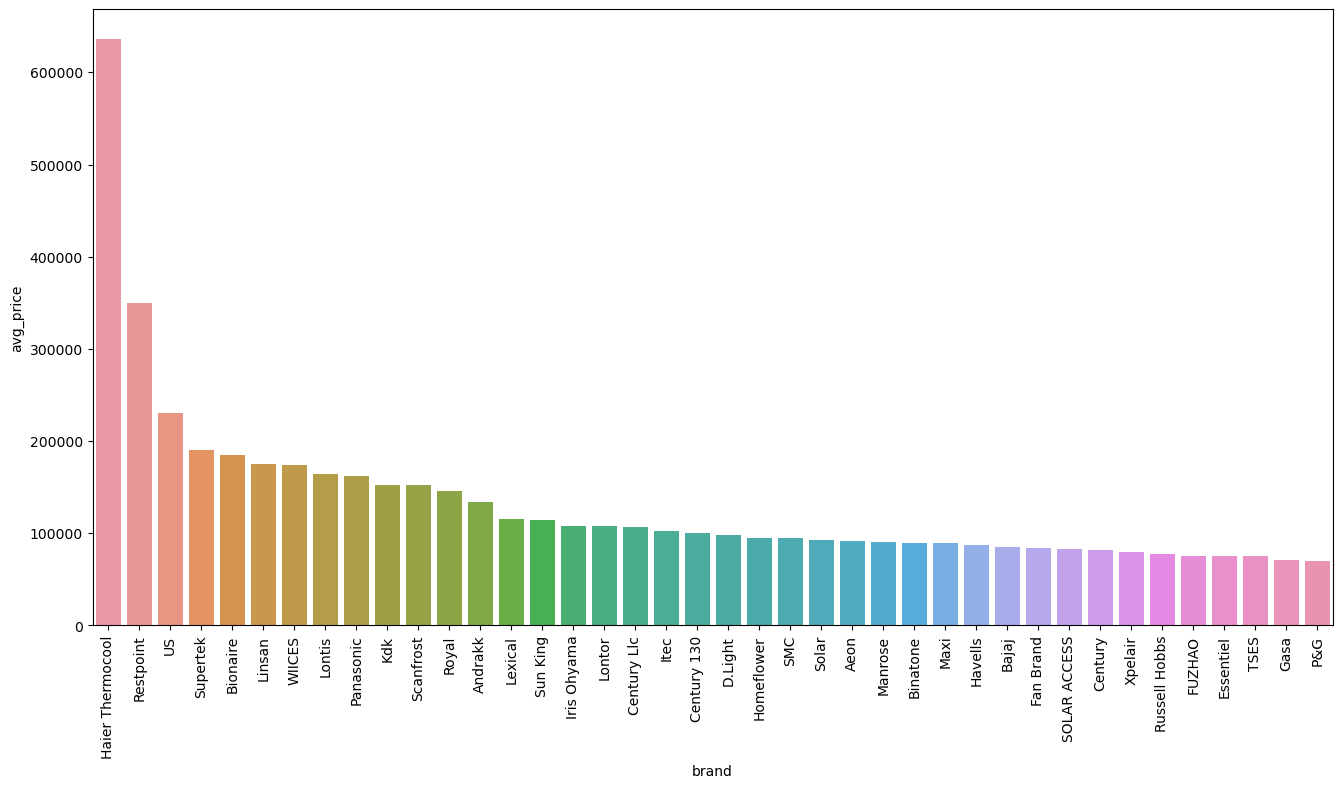

In [352]:
# Top 40 brands and their avg fan prices
avg_prices = np.round(df.groupby('brand')['price'].mean()).reset_index(name='avg_price')
avg_prices.sort_values('avg_price', ascending=False, inplace=True)

plt.figure(figsize=(16, 8))
sns.barplot(x='brand', y='avg_price', data=avg_prices.head(40))
plt.xticks(rotation=90);

In [275]:
df.head()

,full_id,brand,name,price,old_price,discount,rating,total_reviews
0,ox-spacetek-18-inches-standing-fan-334520266,Ox,Ox Spacetek 18 Inches Standing Fan,19400.0,25000.0,22,4.2,270
1,binatone-16-inches-standing-fan-a1691-black-2-...,Binatone,Binatone 16 Inches Standing Fan (A1691) - Blac...,40740.0,50740.0,20,4.3,891
2,glamstar-18-inches-rechargeable-standing-fan-w...,Glamstar,Glamstar 18 Inches Rechargeable Standing Fan W...,69500.0,85000.0,18,4.7,13
3,cloud-energy-16-10watt-dc-standing-fan-with-re...,Cloud Energy,Cloud Energy 16'' 10watt DC Standing Fan With ...,39990.0,50000.0,20,4.3,442
4,nexus-16-inches-standing-fan-nx-4400b-black-82...,Nexus,Nexus 16 Inches Standing Fan (NX 4400B) - Black,20475.0,25475.0,20,4.0,3840
